In [1]:
import os
import sys
print(os.path.abspath("__file__"))
module_path = os.path.abspath(os.path.abspath("__file__")+"/../../../")
if module_path not in sys.path:
    sys.path.append(module_path)

print(module_path)

from test_result.model.Result import Results
file = "time_split_dqn_multi_optimal"
path = os.path.abspath("__file__"+"/../../"+file)
print(path)

results: Results=Results.parse_file(path)
# print(results.json())

/Users/szhao/Code/ML/dqn-rtb-tf2/test_result/visualization/__file__
/Users/szhao/Code/ML/dqn-rtb-tf2
/Users/szhao/Code/ML/dqn-rtb-tf2/test_result/time_split_dqn_multi_optimal


In [2]:
top = sorted(results.__root__, key=lambda result: result.camp_result.click)[::-1][0]

In [3]:
print(top.camp_result.json())

{"imp": 49168.0, "click": 460.0, "cost": 1372471.0, "wr": 0.07999505399926465, "ecpc": 2983.6326086956524, "ecpi": 27.91390741945981}


In [7]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [73]:
def plot_multi(lst, axes_id, title):
    # the first episode does not have action value
    for (i, episode) in enumerate(list(chunks(lst, episode_length - 1))):
        axes[axes_id].plot(episode, label = str(i)); axes[axes_id].set_title(title)
        axes[axes_id].legend()


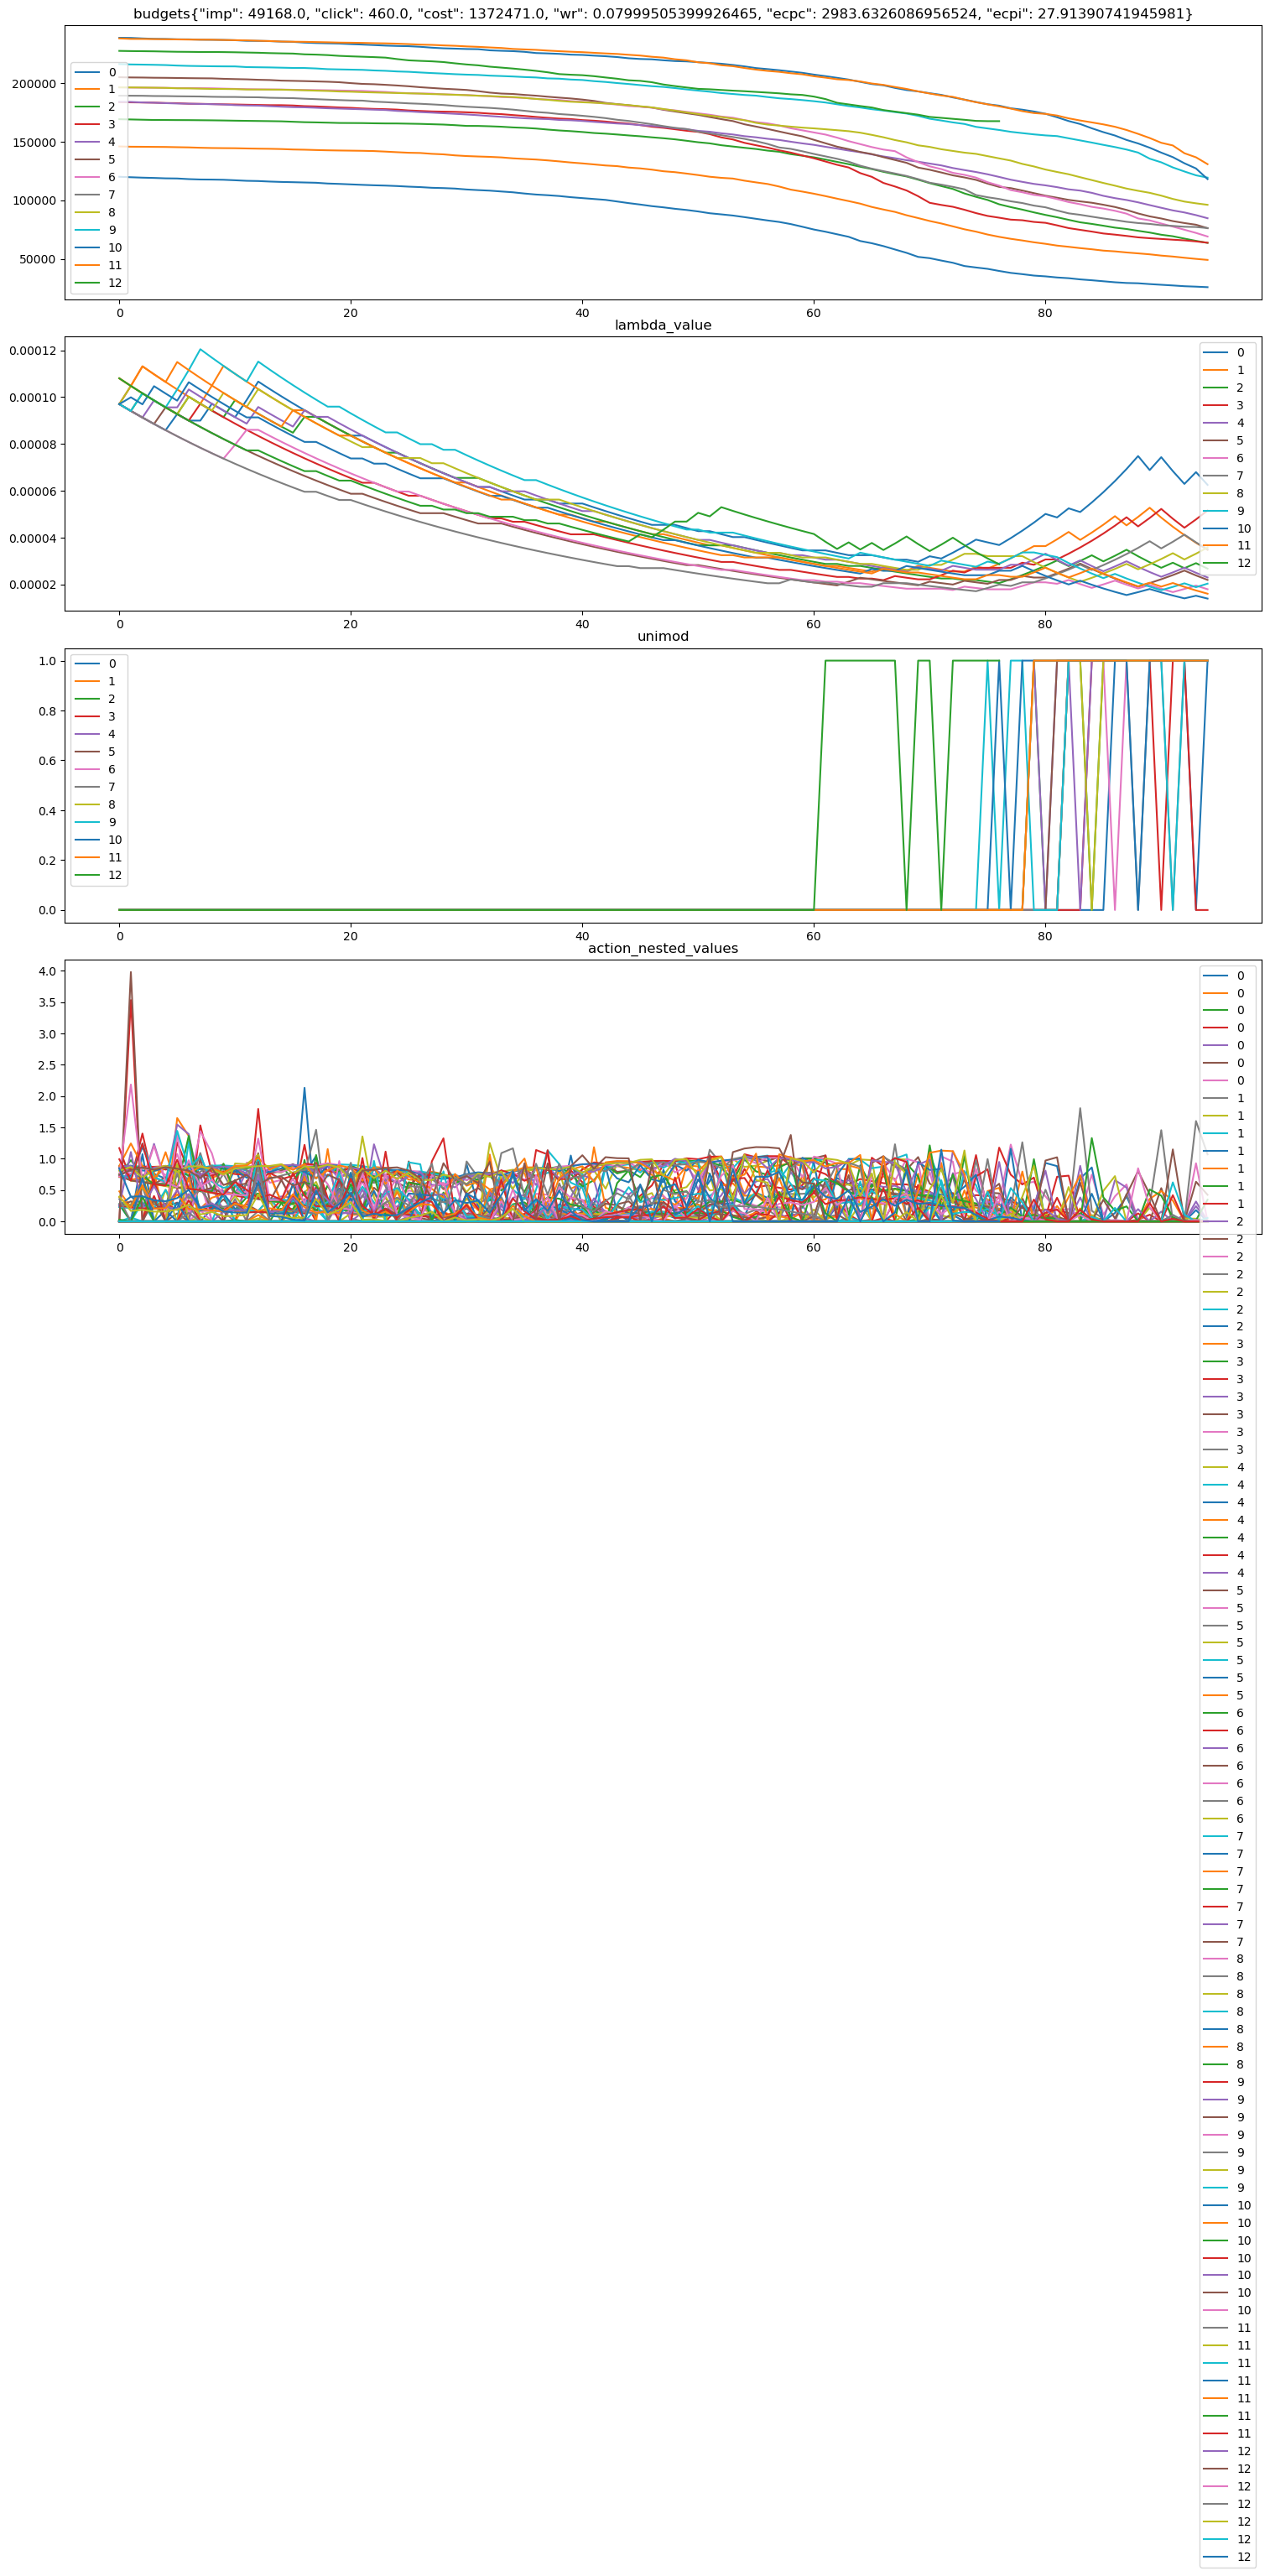

In [74]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import pandas as pd
data = {
    'budgets': top.budget,
    'lambda_value': top.lambda_value,
}

if top.actions:
   data['actions'] = top.actions
if top.unimod:
    data['unimod'] = top.unimod
if top.action_values:
    data['action_values'] = top.action_values
if top.action_nested_values:
    data['action_nested_values'] = top.action_nested_values


fig, axes = plt.subplots(nrows=len(data.keys()), ncols=1, figsize=(15, 15))
fig.tight_layout()
episode_length = top.parameters.episode_length

plot_multi(data['budgets'], 0, 'budgets' + top.camp_result.json())
plot_multi(data['lambda_value'], 1, 'lambda_value')
row = 1
optional_graphs = ['actions', 'unimod', 'action_values', 'action_nested_values']
for column in optional_graphs:
    if column in data.keys():
        row += 1
        ax = axes[row]
        # ax.plot(data[column]); ax.set_title(column)
        plot_multi(data[column], row, column)



[[0.0, 0.8810148239135742, 0.0, 0.0, 0.24610397219657898, 0.0, 0.7256688475608826], [0.0, 0.8863893151283264, 0.0, 0.0, 0.226608544588089, 0.0, 0.6585983037948608], [0.0, 0.8697898387908936, 0.0, 0.0, 0.2524377703666687, 0.0, 0.6860926747322083], [0.0, 0.8721745014190674, 0.0, 0.0, 0.2699691355228424, 0.0, 0.6994084715843201], [0.0, 0.8833767771720886, 0.0, 0.0, 0.23131093382835388, 0.0, 0.6134076118469238], [0.0, 0.7550238966941833, 0.0, 0.5158088803291321, 0.49899253249168396, 0.12786082923412323, 1.0767908096313477], [0.0, 0.8807629942893982, 0.0, 0.0, 0.19829709827899933, 0.0, 0.529155433177948], [0.0, 0.8522374629974365, 0.0, 1.5331699848175049, 0.7668290138244629, 1.0132688283920288, 1.4412189722061157], [0.0, 0.6900561451911926, 0.0, 0.7767777442932129, 0.5516870021820068, 0.17681781947612762, 1.0857316255569458], [0.0, 0.785203218460083, 0.0, 0.0, 0.16699612140655518, 0.0, 0.4458480477333069], [0.0, 0.8455500602722168, 0.0, 0.0, 0.17453929781913757, 0.0, 0.4364308714866638], [0